# Проект : Принятие решений в бизнесе

### Описание проекта:
Отдел маркетинга и я (как аналитик) подготовили список гипотез для увеличения выручки крупного интернет-магазина.


**Цель проекта** - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.  

Есть данные о гипотезах :
* охват пользователей по 10-балльной шкале;
* влияние на пользователей по 10-балльной шкале;
* уверенность в гипотезе по 10-балльной шкале;
* затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Также, есть данные о заказах, идентификаторах пользователей, дате заказа, выручке и группе A/B-теста.


**План работы:**
* открытие файла и изучение общей информации;
* предобработка данных: работа с пропусками, типами данных, дубликатами, аномальными и редкими значениями;
* приоритизация гипотез с помощью ICE, RICE;
* анализ A/B-теста;
* принятие решения по результатам теста.

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
import scipy.stats as stats

In [5]:
import datetime as dt

## Часть 1. Приоритизация гипотез

In [6]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')  

In [7]:
# задаю функцию для переименования столбцов, подсчета пропусков,поиска явных дубликатов,вывода инфо о таблице и первых 5 строк

def dataframe_processing(dataframe):
    
    dataframe.columns = [x.lower().replace(' ', '_') for x in dataframe.columns]
    

    print(dataframe.duplicated().sum())
    print(dataframe.isna().sum())
    print(dataframe.info())
    print(dataframe.head(5))
    
    return dataframe

In [8]:
hypothesis = dataframe_processing(hypothesis)

0
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
                                          hypothesis  reach  impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   

   confidence  efforts  
0           8

In [9]:
#расширю столбец с названием гипотезы

pd.set_option('display.max_colwidth', None)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### 1. 1. Применение фреймворка ICE для приоритизации гипотез. Сортировка их по убыванию приоритета.

Фреймворк ICE состоит из трёх компонент:
* Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
* Efforts — сколько стоит протестировать эту гипотезу. 

Фреймворк RICE отличается от ICE наличием еще одного параметра:
* Reach — скольких пользователей затронет изменение, которое вы хотите внести.

In [10]:
# значения impact * confidence и разделить на efforts

hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence'] / hypothesis['efforts']
hypothesis['ICE'] = round(hypothesis['ICE'], 2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


***Вывод: наиболее перспективные гипотезы по ICE: №8, 0, 7, 6.***

### 1. 2. Применение фреймворка RICE для приоритизации гипотез. Сортировка их по убыванию приоритета.

In [11]:
# значения riach * impact * confidence и разделить на efforts

hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


***Вывод: наиболее перспективные гипотезы по RICE: №7, 2, 0, 6.***

#### При приоритизации гипотез по методу RICE топ-4 отличаются от метода ICE, потому что в гипотезе 7,2,0 и 6 больше  Reach — кол-во пользователей, которых затронет изменение.

## Часть 2. Анализ A/B-теста

In [12]:
orders, visitors  = (
    pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),  # покупки
    pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv'),  # журнал сессий
)

In [13]:
orders = dataframe_processing(orders)

0
transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
   transactionid   visitorid        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B


In [14]:
# приведение столбца с датой к нужному формату

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [15]:
visitors = dataframe_processing(visitors)

0
date        0
group       0
visitors    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


In [16]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

**Проверю, нет ли совпадений в идентификаторе покупателя в двух группах.**

In [17]:
a = orders.query('group == "A"')

In [18]:
b = orders.query('group == "B"')

In [19]:
d = np.intersect1d(a['visitorid'],b['visitorid'])
len(d)

58

***58 пользователей встречаются в обеих группах. В идеале такого быть не должно, т.к. А/А тест, который проводят ДО А/В теста, должен исключить дубляж пользователей. Можно было бы удалить эти пересечения для дальнейшего исследования, но я их оставлю, т.к. в таблице visitors есть данные о визитах всех пользователей, и удалить данные по дублированным ID не получится - в таблице нет данных об ID. Проверю также распределение долей групп.***

In [20]:
# доля пользователей в группе А

a['visitorid'].nunique()/(orders['visitorid'].nunique())*100

48.78758486905917

In [21]:
# доля пользователей в группе В

b['visitorid'].nunique()/(orders['visitorid'].nunique())*100

56.83802133850631

***Из-за дублирования пользователей в обеих группах, доли распределены неравномерно, что также может искажать результат теста.***

In [22]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [23]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

**Вывод : в А/В тесте принимают участие две группы.
Период проведения : с 01.08.2019 по 31.08.2019.
Группы сбалансированы неравномерно из-за того, что одни и те же пользователи попадают и в группу А, и в группу В.**

### 1.2. График кумулятивной выручки по группам. 

In [24]:
# создаем массив уникальных пар значений дат и групп теста

datesGroups = orders[['date','group']].drop_duplicates()

In [25]:
# получаем агрегированные кумулятивные по дням данные о заказах 

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique',\
 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [26]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),\
axis=1).sort_values(by=['date','group'])

In [27]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [28]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]


In [30]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

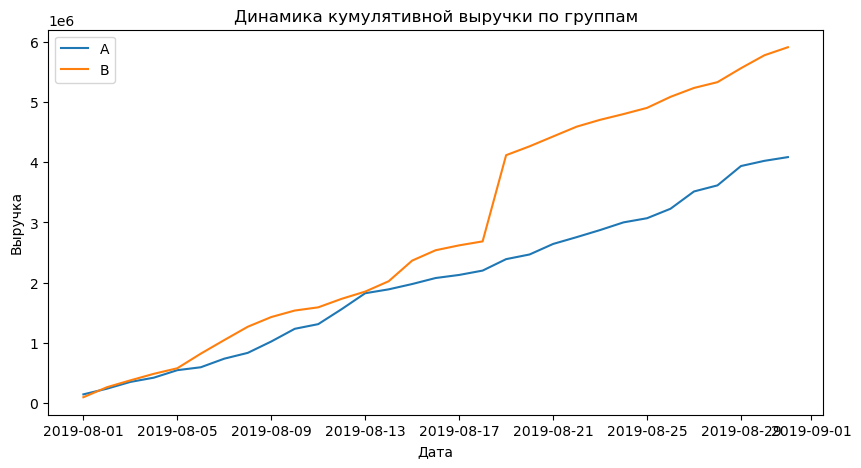

In [31]:
# Строим график выручки группы А
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Динамика кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка');

***Выручка группы А увеличивается равномерно, а вот в группе В в определенный момент происходит резкий скачок, что может быть  всплеском числа заказов, либо появлением очень дорогих заказов в выборке.***

### 2.2.График кумулятивного среднего чека по группам. 

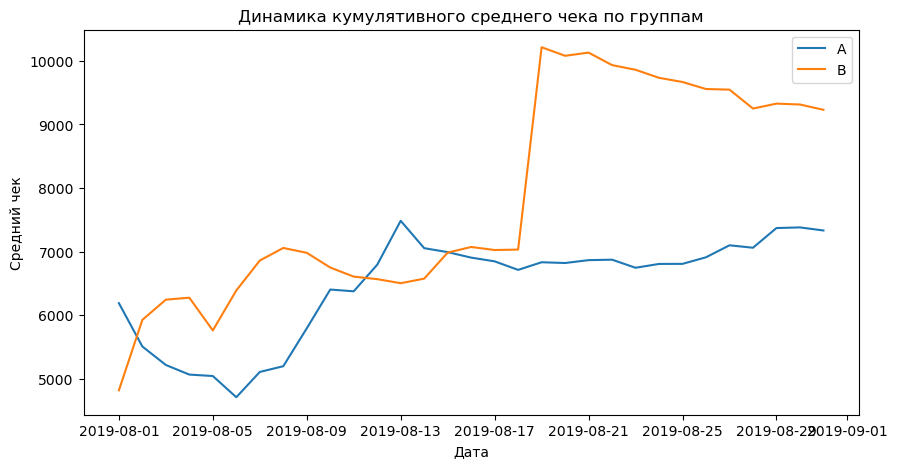

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Динамика кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек');

***Средний чек в двух группах распределен не очень неравномерно, особенно в группе В. Резкий всплеск в середине теста в группе В может быть из-за того, что в тот период были совершены покупки на крупные суммы, т.к. после всплеска средний чек становится чуть более равномерным и постепенно падает. Средний чек группы А распределен чуть более равномерно, особенно после середины теста.***

### 2.3. График относительного изменения кумулятивного среднего чека группы B к группе A. 

In [33]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


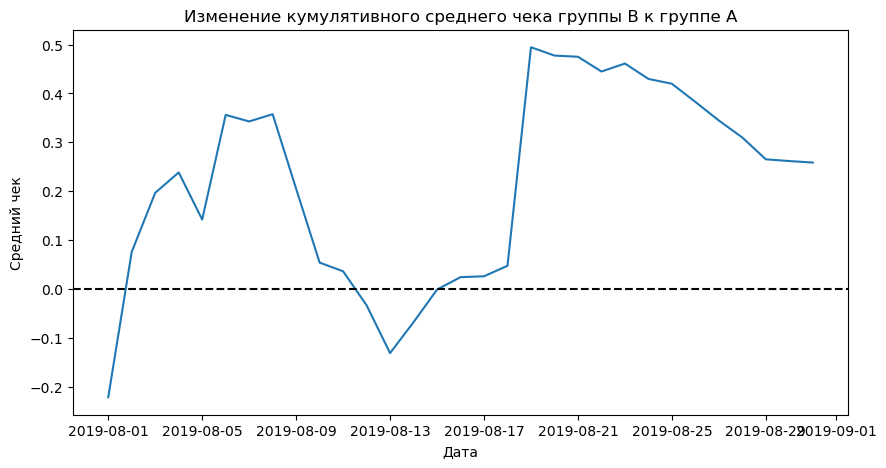

In [34]:
# cтроим отношение средних чеков
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек');

***В нескольких точках график различия между сегментами резко «скачет». Скорее всего где-то есть крупные заказы и выбросы.***

### 2.4. График кумулятивного среднего количества заказов на посетителя по группам. 

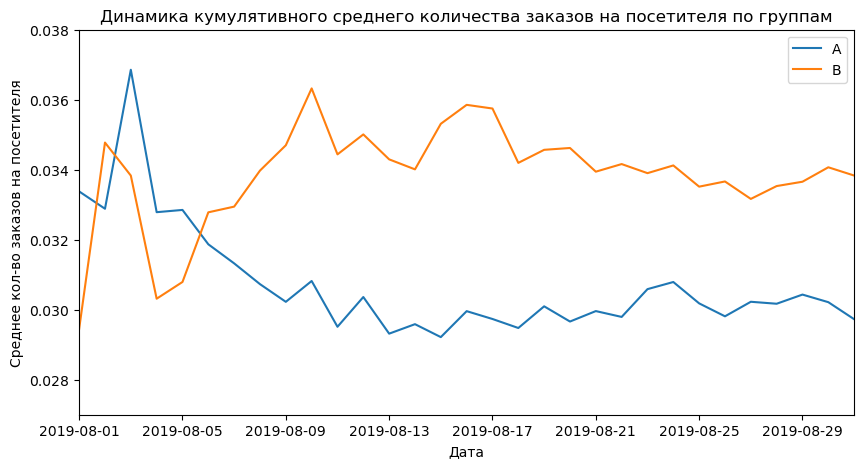

In [35]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Динамика кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов на посетителя')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.027, 0.038]);

***Вывод: кумулятивное среднее количества заказов на посетителя по группам распределено равномерно, почти всё время на протяжении теста лидирует группа В.***

### 2.5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

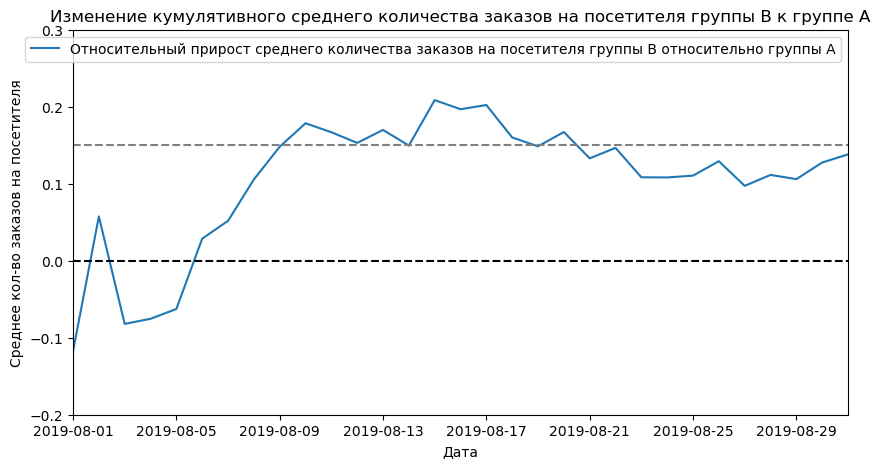

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()
plt.title('Изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов на посетителя')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.2, 0.3]);

***Почти с начала теста группа В лидирует в среднем количестве заказов на посетителя, прирост по сравнению с группой А примерно на 15%.***

### 2.6. Точечный график количества заказов по пользователям.

In [37]:
ordersbyusers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersbyusers.columns = ['userid', 'orders']

In [38]:
x_values = pd.Series(range(0, len(ordersbyusers)))

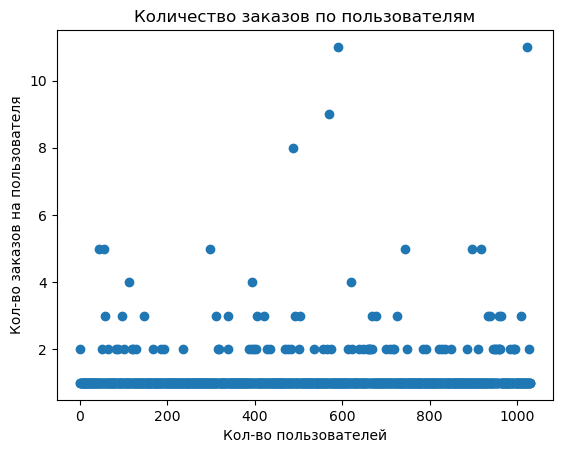

In [39]:
plt.scatter(x_values, ordersbyusers['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов на пользователя');

***Пользователей, которые заказали более 2 раз, мало.***

### 2.7. Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [40]:
np.percentile(ordersbyusers['orders'], [95, 99])

array([2., 4.])

***Не более 5% пользователей совершали больше двух заказов, и не более 1% сделали более 4 покупок.***

Принимаю за аномальных пользователей тех, кто совершил от 3 заказов, так мы уберём 5% пользователей с наибольшим числом заказов.

### 2.8. Точечный график стоимостей заказов. 

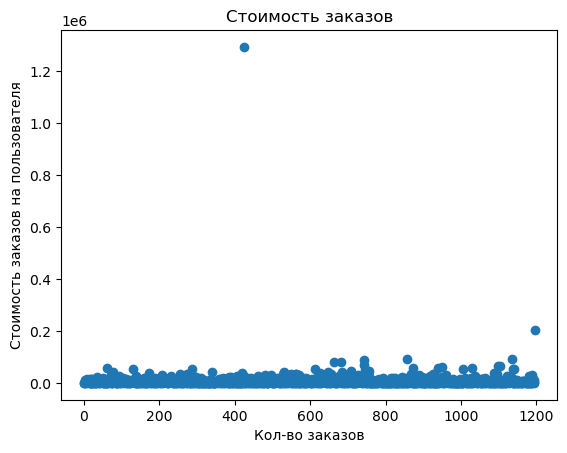

In [41]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Кол-во заказов')
plt.ylabel('Стоимость заказов на пользователя');

***Заказов стоимостью более 10 000 не очень много, есть выбросы в районе 200 000 - 1 100 000. Заказ на 1 100 000 выглядит ненормально.***

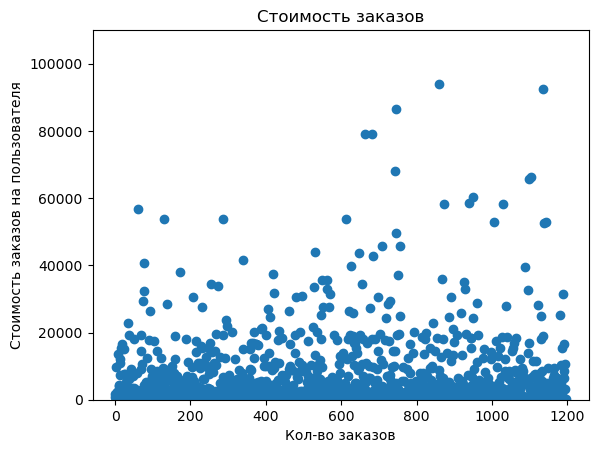

In [42]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Кол-во заказов')
plt.ylabel('Стоимость заказов на пользователя')
plt.ylim(0, 110000);

На графике без двух крупных покупок видно, что стоимость заказов чаще была не более 10 000.

### 2.9. Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.

In [43]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

***Не более, чем у 5% чек дороже 28 000, и не более 1% с чеком больше 58 233.***

Принимаю за аномальных пользователей тех, кто совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с дорогими заказами.

### 2.10.Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Для определения статистической значимости буду использовать непараметрический тест Манна-Уитни, т.к. в данных есть выбросы.

In [44]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

(ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')).head(5)


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


**Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет. Альтернативная гипотеза: различия в среднем кол-ве заказов на посетителя между группами есть.** 

In [45]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительная разница между сравниваемыми величинами', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value 0.017
Относительная разница между сравниваемыми величинами 0.138


***Вывод: По «сырым» данным есть различия в среднем числе заказов групп A и B. 
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можно отвергнуть. Среднее число заказов в группе В выше примерно на 14%.***

### 2.11. Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. 

**Нулевая гипотеза: различий в среднем чеке между группами по «сырым» данным нет. Альтернативная гипотеза: различия в среднем чеке между группами по «сырым» данным есть.**

In [46]:
print('p-value', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница между сравниваемыми величинами', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value 0.729
Относительная разница между сравниваемыми величинами 0.259


***P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Cредний чек группы B немного выше среднего чека группы A.***

### 2.12. Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

95-й и 99-й перцентили средних чеков равны 28 000 и 58233. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и  5% пользователей с дорогими заказами.

In [47]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersbyusers['orders'], 95)]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersbyusers['orders'], 95)]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64
74


In [48]:
round((abnormalUsers.shape[0]/orders['visitorid'].nunique())*100,2)

7.18

74 пользователей, 7% от общего количества уникальных ID. Посчитаю статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

**Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет. Альтернативная гипотеза: различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.**

In [49]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница между сравниваемыми величинами','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value 0.013
Относительная разница между сравниваемыми величинами 0.173


***Как и в случае с "сырыми" данными, в "очищенных" среднее кол-во заказов в группе В выше, чем в А.***

### 2.13. Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

**Нулевая гипотеза: различий в среднем чеке заказа между группами по «очищенным» данным нет. Альтернативная гипотеза: различия в среднем чеке заказа между группами по «очищенным» данным есть.**

In [50]:
print('p-value',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительная разница между сравниваемыми величинами',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value 0.738
Относительная разница между сравниваемыми величинами -0.020


***p-value больше 0.05, значит статистически значимых различий в средних чеках в группах нет. В группе В значение на 2% меньше, что отличается от показателя, полученного по "сырым" данным. По "сырым" данным в группе В средний чек был выше.***

### 2.14. Принятие решения по результатам теста. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Вывод:**

* Есть статистически значимое различие среднего количества заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий.
* По сырым и очищенным данным нет статистически значимого различия по среднему чеку между группами. До фильтрации аномалий средний чек группы В был выше, но после удаления аномалий чек стал ниже.
* График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A.


**Исходя из результатов, можно остановить тест и зафиксировать победу группы В, т.к. кол-во заказов выросло, а значит в целом растет и выручка, хоть средний чек и не имеет статистически значимого различия.**